In [13]:
import pandas as pd
import numpy as np

data = pd.read_csv('gradesheet.csv')
data.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [14]:
# check the number of samples
data.shape

(748, 6)

In [15]:
# Which of the features has least variance?

data_features = data.drop('Target', axis = 1)

data_labels = data['Target'].copy()

In [16]:
data_features.head()

,V1,V2,V3,V4,V5
0,2.0,50.0,12500.0,98.0,NEGATIVE
1,0.0,13.0,3250.0,28.0,NEGATIVE
2,?,?,4000.0,35.0,NEGATIVE
3,?,20.0,5000.0,45.0,NEGATIVE
4,1.0,24.0,6000.0,77.0,NEGATIVE


In [17]:
# check for any missing values:

data_features.isna().sum()

V1    0
V2    0
V3    0
V4    0
V5    0
dtype: int64

In [18]:
colum = ['V1','V2','V3','V4','V5']

for col in colum:
  print(f'col: {col}   {data_features[col].unique()}')

col: V1   ['2.0' '0.0' '?' '1.0' '4.0' '5.0' '9.0' '3.0' '12.0' '6.0' '11.0' '10.0'
 '13.0' '8.0' '14.0' '7.0' '16.0' '15.0' '23.0' '21.0' '18.0' '22.0'
 '26.0' '35.0' '38.0' '40.0' '74.0' '20.0' '17.0' '25.0' '39.0' '72.0']
col: V2   ['50.0' '13.0' '?' '20.0' '24.0' '12.0' '9.0' '46.0' '3.0' '10.0' '6.0'
 '5.0' '14.0' '11.0' '8.0' '16.0' '7.0' '2.0' '19.0' '4.0' '17.0' '1.0'
 '15.0' '22.0' '18.0' '38.0' '43.0' '34.0' '44.0' '26.0' '41.0' '21.0'
 '33.0']
col: V3   [12500.  3250.  4000.  5000.  6000.  1000.  1750.  3000.  2250. 11500.
  5750.   750.  2500.  1500.  1250.  3500.  3750.  2750.  2000.   500.
  4750.  4250.   250.  5500.  4500.  9500. 10750.  8500. 11000.  6500.
 10250.  5250.  8250.]
col: V4   [98. 28. 35. 45. 77.  4. 14. 22. 58. 47. 15. 11. 48. 49. 16. 40. 34. 21.
 26. 64. 57. 53. 69. 36.  2. 46. 52. 81. 29.  9. 74. 25. 51. 71. 23. 86.
 38. 76. 70. 59. 82. 61. 79. 41. 33. 10. 95. 88. 19. 37. 39. 78. 42. 27.
 24. 63. 43. 75. 73. 50. 60. 17. 72. 62. 30. 31. 65. 89. 87. 93. 8

In [19]:
# remove the ?
# missing values in V1
data_features.loc[data_features['V1'] == '?', 'V1'].count()

5

In [20]:
# missing values in V2
data_features.loc[data_features['V2'] == '?', 'V2'].count()

5

In [21]:
data_features.replace('?', np.nan, inplace = True)

In [22]:
data_features.drop(['V5'], axis = 1, inplace = True)

In [23]:
data_features

,V1,V2,V3,V4
0,2.0,50.0,12500.0,98.0
1,0.0,13.0,3250.0,28.0
2,NaN,NaN,4000.0,35.0
3,NaN,20.0,5000.0,45.0
4,1.0,24.0,6000.0,77.0
...,...,...,...,...
743,23.0,2.0,500.0,38.0
744,21.0,2.0,500.0,52.0
745,23.0,3.0,750.0,62.0
746,39.0,1.0,250.0,39.0


In [24]:
# now that the nan values are there- we can use imputer

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer = imputer.fit(data_features)
data_features_imputed = imputer.transform(data_features)

In [25]:
tr_features = pd.DataFrame(data_features_imputed)

In [26]:
tr_features

,0,1,2,3
0,2.0,50.0,12500.0,98.0
1,0.0,13.0,3250.0,28.0
2,8.0,4.0,4000.0,35.0
3,8.0,20.0,5000.0,45.0
4,1.0,24.0,6000.0,77.0
...,...,...,...,...
743,23.0,2.0,500.0,38.0
744,21.0,2.0,500.0,52.0
745,23.0,3.0,750.0,62.0
746,39.0,1.0,250.0,39.0


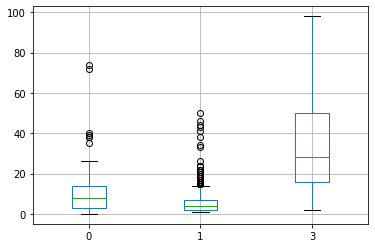

In [27]:
# check outliers

tr_features.boxplot(column = [0,1,3])

In [28]:
# target labels description
data_labels.value_counts()

NO     570
YES    178
Name: Target, dtype: int64

In [29]:
# what is average of first feature after simple imputer with stragety median
tr_features.mean()

0       9.552139
1       5.454545
2    1378.676471
3      34.282086
dtype: float64

In [30]:
# What is average of first column after applyting KNNImputer(n_neighbors = 3)?

from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values = np.nan, n_neighbors = 3)
imputer = imputer.fit(data_features)
data_features_imputed = imputer.transform(data_features)

In [31]:
knn_features = pd.DataFrame(data_features_imputed)
knn_features.head()

,0,1,2,3
0,2.0,50.0,12500.0,98.0
1,0.0,13.0,3250.0,28.0
2,9.0,16.0,4000.0,35.0
3,3.0,20.0,5000.0,45.0
4,1.0,24.0,6000.0,77.0


In [32]:
knn_features.mean()

0       9.532977
1       5.516043
2    1378.676471
3      34.282086
dtype: float64

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(data_features)
data_features_imputed = imputer.transform(data_features)

In [34]:
pd.DataFrame(data_features_imputed).mean()

0       9.562584
1       5.464334
2    1378.676471
3      34.282086
dtype: float64